In [239]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

In [240]:
df = pd.read_csv('top500_combined_data (1).csv')

# Remove first row
df = df.iloc[1:]
# Rename columns for ease
rename_dict = {
    'Unnamed: 3': 'Cores old',
    'Unnamed: 5': 'Years old',
    'Unnamed: 6': 'Processors old'
}
df.rename(columns=rename_dict, inplace=True)

# Getting Cores 1993-2008 in a usable format
def edit_dataframe_values(df, column_name):
    def extract_numbers(item):
        # Convert item to string before splitting
        item_str = str(item)
        parts = item_str.split('/')
        if len(parts) == 2:
            return ''.join(filter(str.isdigit, parts[1]))
        return item_str  # Return the original item if it doesn't contain '/'

    # Convert column values to string and then apply the processing
    df[column_name] = df[column_name].astype(str).apply(extract_numbers)
    return df

df = edit_dataframe_values(df, 'Cores old')

/var/folders/wg/bqtpsjds1p16_p2clkzkw5d80000gn/T/ipykernel_34492/18449505.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,26,27,28,29,36,37,39,40,41,42,43,44,45,46,47,48,52,53,60,62,64,69,71) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('top500_combined_data (1).csv')


In [241]:
columns_old = ['Cores old', 'Years old', 'Processors old']
columns_new = ['Cores', 'Year', 'Processors']
df_old = df[columns_old]
df_new = df[columns_new]

# Remove NaN values
# Convert the 'Cores old' column to a numeric type, just in case
df_old['Cores old'] = pd.to_numeric(df_old['Cores old'], errors='coerce')
df_old = df_old.dropna(subset=['Cores old'])
df_new = df_new.dropna(subset=['Cores'])


/var/folders/wg/bqtpsjds1p16_p2clkzkw5d80000gn/T/ipykernel_34492/462754305.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_old['Cores old'] = pd.to_numeric(df_old['Cores old'], errors='coerce')


In [242]:
# Renaming the columns in df_old to match those in df_new
df_old.columns = ['Cores', 'Year', 'Processors']

# Concatenating the DataFrames
combined_df = pd.concat([df_old, df_new], axis=0)
combined_df

,Cores,Year,Processors
1,1024.0,1993,1024
2,544.0,1993,544
3,512.0,1993,512
4,512.0,1993,512
5,44.0,1990,4
...,...,...,...
18525,7140.0,2011,NaN
18526,7140.0,2011,NaN
18527,4428.0,2011,NaN
18528,4800.0,2011,NaN


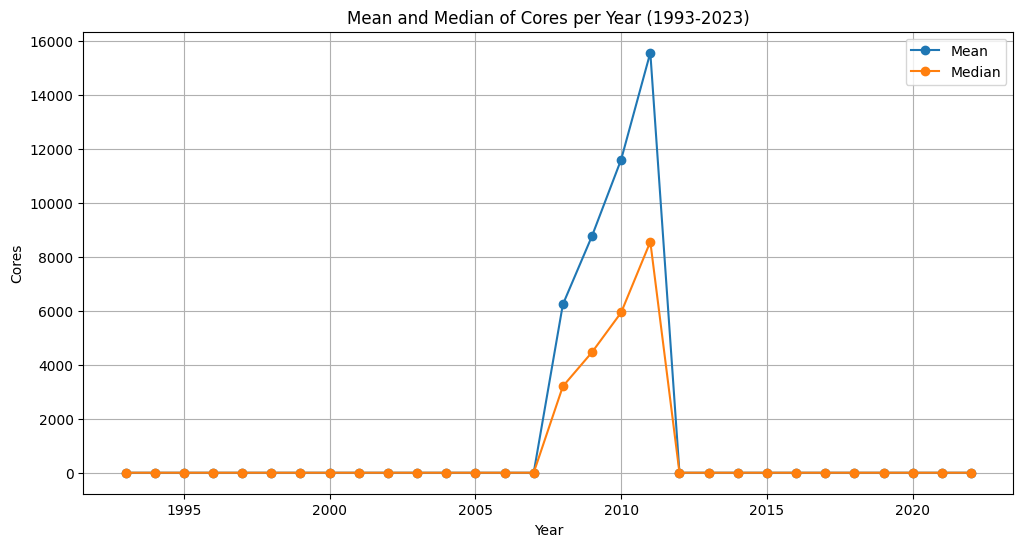

In [245]:
# Handling missing years: creating a DataFrame for all years from 1993 to 2023
all_years = pd.DataFrame({'Year': range(1993, 2023)})
grouped = combined_df.groupby('Year')['Cores'].agg(['mean', 'median'])

# Merging with all_years to include years without data
grouped = all_years.merge(grouped, on='Year', how='left')

# Replacing NaN values with 0 for better visualization
grouped.fillna(0, inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(grouped['Year'], grouped['mean'], marker='o', label='Mean')
plt.plot(grouped['Year'], grouped['median'], marker='o', label='Median')
plt.title('Mean and Median of Cores per Year (1993-2023)')
plt.xlabel('Year')
plt.ylabel('Cores')
plt.grid(True)
plt.legend()
plt.show()

In [244]:
# Now let's aggregate the years, calculating mean and median, ignoring null values
df_grouped = df.groupby('Years old')['Processors old'].agg(['mean', 'median']).reset_index()

# Plotting the line plot for mean and median chips over time
plt.figure(figsize=(14, 7))
plt.plot(df_grouped['Years old'], df_grouped['mean'], label='Mean Processors', marker='o')
plt.plot(df_grouped['Years old'], df_grouped['median'], label='Median Processors', linestyle='--', marker='x')
plt.title('Mean and Median Chips Over Time (1993 - 2023)')
plt.xlabel('Year')
plt.ylabel('Number of Processors')
plt.legend()
plt.grid(True)
plt.show()

TypeError: Could not convert ProcessorsProcessorsProcessorsProcessorsProcessorsProcessorsProcessorsProcessorsProcessorsProcessorsProcessorsProcessorsProcessorsProcessorsProcessorsProcessorsProcessorsProcessorsProcessorsProcessorsProcessorsProcessorsProcessorsProcessorsProcessorsProcessorsProcessorsProcessorsProcessors to numeric

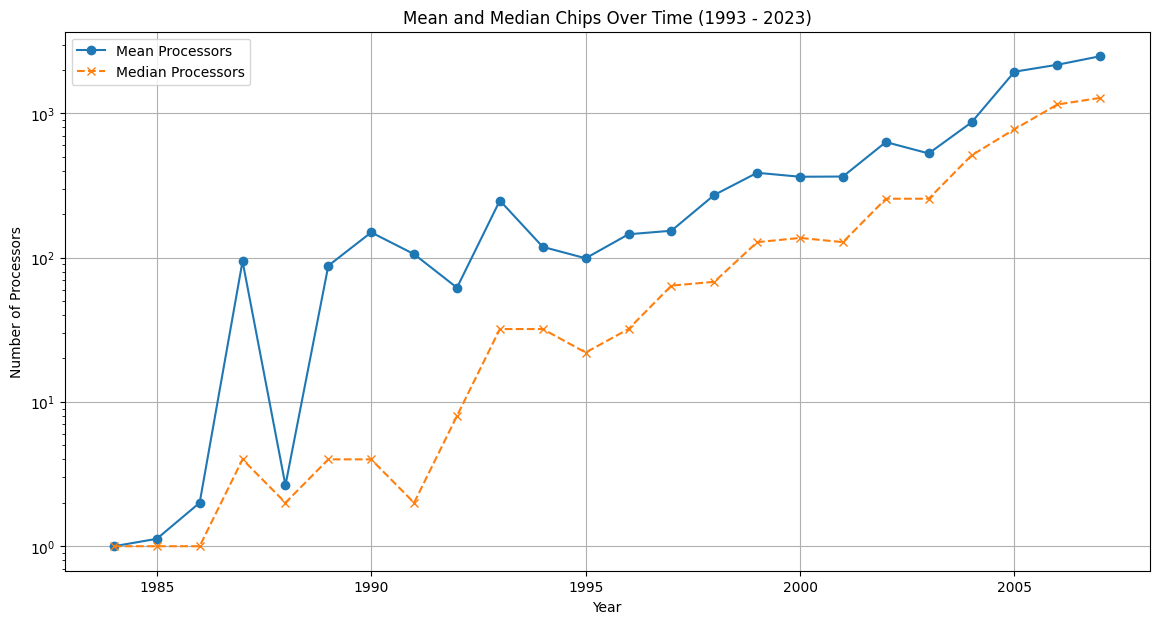

In [ ]:
# Now let's aggregate the years, calculating mean and median, ignoring null values
df_grouped = df.groupby('Years')['Processors'].agg(['mean', 'median']).reset_index()

# Plotting the line plot for mean and median chips over time
plt.figure(figsize=(14, 7))
plt.plot(df_grouped['Years'], df_grouped['mean'], label='Mean Processors', marker='o')
plt.plot(df_grouped['Years'], df_grouped['median'], label='Median Processors', linestyle='--', marker='x')
plt.title('Mean and Median Chips Over Time (1993 - 2023)')
plt.xlabel('Year')
plt.ylabel('Number of Processors')
plt.legend()
plt.grid(True)
plt.yscale("log")  # Use logarithmic scale for the y-axis
plt.show()

In [ ]:
# Load the combined dataset
data = pd.read_csv("top500_combined_data.csv")

# Print unique column names for each year
for year in data['Year'].unique():
    yearly_data = data[data['Year'] == year]
    print(f"Year: {year}, Columns: {list(yearly_data.columns)}\n")

FileNotFoundError: [Errno 2] No such file or directory: 'top500_combined_data.csv'

In [ ]:
years = []
max_cores_or_processors = []

# Go through each year
for year in sorted(data['Year'].unique()):
    yearly_data = data[data['Year'] == year]

    # Priority based column selection
    for column in ['Total Cores', 'Cores', 'Processors']:
        if column in yearly_data.columns and yearly_data[column].max() > 0:
            years.append(year)
            max_cores_or_processors.append(yearly_data[column].max())
            break

# Plotting the data
plt.figure(figsize=(15, 7))
plt.plot(years, max_cores_or_processors, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Max Cores/Processors')
plt.title('Max Cores/Processors by Year')
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()